In [1]:
import pandas as pd

# Abrir los datasets

In [2]:
crime_scene_report     = pd.read_csv("./datasets/Crime Scene report.csv")
drivers_license        = pd.read_csv("./datasets/Drivers license.csv")
facebook_event_checkin = pd.read_csv("./datasets/facebook_event_checkin.csv")
getfitnow_checkin      = pd.read_csv("./datasets/GetFitNow check in.csv")
getfitnow_members      = pd.read_csv("./datasets/GetFitNow members.csv")
income                 = pd.read_csv("./datasets/income.csv")
interview              = pd.read_csv("./datasets/Interviews.csv")
person                 = pd.read_csv("./datasets/Person.csv")

# ESCENA DEL CRIMEN

In [3]:
crime_scene_report

,Date,Type,Description,City
0,2017-01-07,smuggling,NaN,Savannah
1,2017-01-11,murder,NaN,Springdale
2,2017-01-12,smuggling,NaN,Melbourne
3,2017-01-13,assault,NaN,Reading
4,2017-01-14,blackmail,NaN,Orange
...,...,...,...,...
1223,2018-04-10,arson,"its head impatiently, and walked a little quic...",Santa Ana
1224,2018-04-14,arson,go down the chimney!’,San Jose
1225,2018-04-17,arson,"Alice, she went on, ‘What’s your name, child?’",Clarke County
1226,2018-04-25,arson,simply--“Never imagine yourself not to be othe...,Louisville


In [4]:
crime_scene_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1228 non-null   object
 1   Type         1228 non-null   object
 2   Description  939 non-null    object
 3   City         1228 non-null   object
dtypes: object(4)
memory usage: 38.5+ KB


# ASESINATOS EN CIUDADES EN JAN 15 2018

In [5]:
informe = crime_scene_report[(crime_scene_report["Date"] == "2018-01-15") & 
                            (crime_scene_report["Type"] == "murder")]
informe

,Date,Type,Description,City
674,2018-01-15,murder,Life? Dont talk to me about life.,Albany
675,2018-01-15,murder,"Mama, I killed a man, put a gun against his he...",Reno
781,2018-01-15,murder,Security footage shows that there were 2 witne...,Pandas City


# El ÍNDICE 781 señala un asesinato en particular que tuvo lugar en Pandas City el 15 de enero de 2018

In [15]:
crime_scene_report.iloc[[781]]

,Date,Type,Description,City
781,2018-01-15,murder,Security footage shows that there were 2 witne...,Pandas City


In [17]:
crime_scene_report['Description'].iloc[[781]]

781    Security footage shows that there were 2 witne...
Name: Description, dtype: object

# Según el registro hay 2 testigos. 1 en Northwest Drive y el segundo en Franklin Avenue. Echemos un vistazo a la información de los archivos para identificar dónde está la siguiente pista.

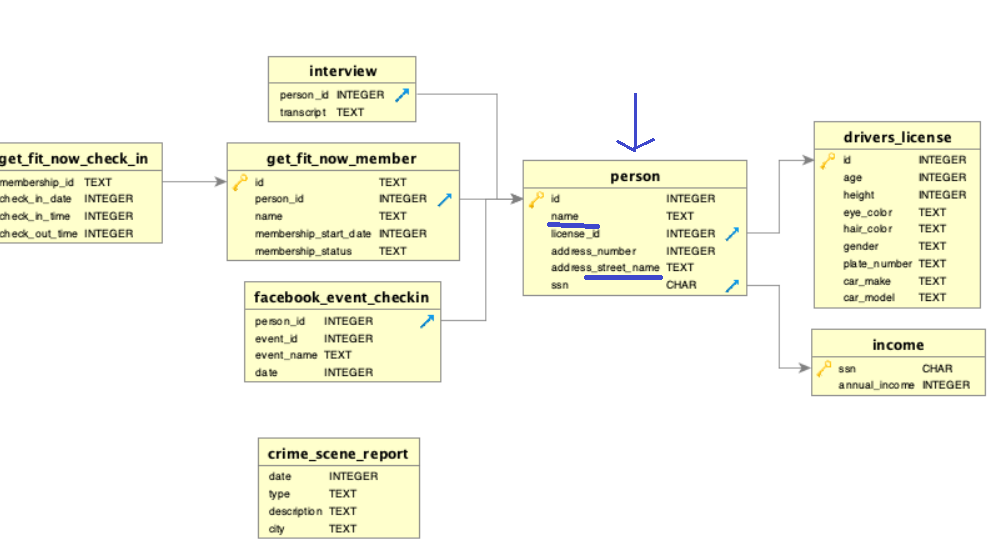

# Intentemos verificar el nombre de la persona vinculada a Northwest Drive o Franklin Avenue.

In [18]:
person[(person['Address_Street_Name']=='Northwestern Dr')|(person['Address_Street_Name']=='Franklin Ave')]

,Id,Name,License_Id,Address_Number,Address_Street_Name,Ssn
2,10010,Muoi Cary,385336,741,Northwestern Dr,828638512
235,12207,Wilmer Wolever,509484,139,Franklin Ave,636825374
282,12711,Norman Apolito,667757,599,Northwestern Dr,778264744
499,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949
528,15171,Weldon Penso,336999,311,Northwestern Dr,131379495
...,...,...,...,...,...,...
9609,96595,Coretta Cubie,303645,3631,Northwestern Dr,378403829
9756,97913,Cameron Dilick,971988,2954,Franklin Ave,665147939
9841,98593,Jonah Toner,578982,2947,Northwestern Dr,745853548
9864,98744,Jordan Myntti,256116,3104,Franklin Ave,876030104


# BUSCANDO A ANNABEL SEGUN LA INTERVIEW

In [42]:
# INTERVIEW
# (person['Address_Street_Name']== 'Franklin Ave')|
person[(person['Address_Street_Name']== 'Franklin Ave')|(person['Name'].str.contains=='Annabel')]

,Id,Name,License_Id,Address_Number,Address_Street_Name,Ssn
235,12207,Wilmer Wolever,509484,139,Franklin Ave,636825374
665,16371,Annabel Miller,490173,103,Franklin Ave,318771143
807,17683,Johnnie Schee,968887,1277,Franklin Ave,815977821
936,18651,Carleen Etoll,356746,22,Franklin Ave,193369255
1377,22636,Zachary Ybarbo,768359,785,Franklin Ave,285346605
1608,24737,Gema Nantz,273410,3968,Franklin Ave,180545802
2236,30654,Clarita Rickels,418084,2254,Franklin Ave,714941023
2427,32264,Shelby Dezeeuw,735415,1391,Franklin Ave,143197463
2584,33793,Amado Mattan,161915,99,Franklin Ave,125205748
2661,34592,Cordell Lindamood,592762,3657,Franklin Ave,509890333


# Anabel ID es 16371, hay que ver quien esta inscrito al mismo gym que Anabel

In [33]:
# INTERVIEW PERSON WHOSE ID is 16371
interview[interview['Person_Id']==16371]

,Person_Id,Transcript
4989,16371,"I saw the murder happen, and I recognized the ..."


Revisamos en el Interview document la info registrada en la entrevista

Annabel Miller: "I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th."

# REGISTROS ASOCIADOS a Annabel Jan 9th

In [36]:
getfitnow_members[getfitnow_members['Person_Id']== 16371]

,Id,Person_Id,Name,Membership_Start_Date,Membership_Status
67,90081,16371,Annabel Miller,2016-02-08,Gold


# REVISAR ASISTENCIA EN JAN 9TH 

In [37]:
getfitnow_checkin

,Membership_Id,Check_In_Date,Check_In_Time,Check_Out_Time
0,NL318,2018-02-12,329,365
1,NL318,2017-08-11,469,920
2,NL318,2018-04-29,506,554
3,NL318,2018-01-28,124,759
4,NL318,2017-10-27,418,1019
...,...,...,...,...
2698,4KB72,2017-04-22,1016,1114
2699,4KB72,2017-06-30,408,885
2700,48Z7A,2018-01-09,1600,1730
2701,48Z55,2018-01-09,1530,1700


In [40]:
getfitnow_checkin[getfitnow_checkin['Check_In_Date']=='2018-01-09']

,Membership_Id,Check_In_Date,Check_In_Time,Check_Out_Time
113,X0643,2018-01-09,957,1164
889,UK1F2,2018-01-09,344,518
1329,XTE42,2018-01-09,486,1124
1446,1AE2H,2018-01-09,461,944
1703,6LSTG,2018-01-09,399,515
2137,7MWHJ,2018-01-09,273,885
2435,GE5Q8,2018-01-09,367,959
2700,48Z7A,2018-01-09,1600,1730
2701,48Z55,2018-01-09,1530,1700
2702,90081,2018-01-09,1600,1700


# REVISAR LAS PERSONAS QUE ESTUVIERON EN EL MISMO EVENTO QUE ANNABEL

In [44]:
facebook_event_checkin

,person_id,event_id,event_name,date
0,28508,5880,Nudists are people who wear one-button suits.\r\n,20170913
1,63713,3865,but that's because it's the best book on anyth...,20171009
2,63713,3999,"If Murphy's Law can go wrong, it will....",20170502
3,63713,6436,Old programmers never die. They just branch t...,20170926
4,82998,4470,Help a swallow land at Capistrano.\r\n,20171022
...,...,...,...,...
20006,99716,1143,SQL Symphony Concert,20171206
20007,99716,1143,SQL Symphony Concert,20171212
20008,99716,1143,SQL Symphony Concert,20171229
20009,67318,4719,The Funky Grooves Tour,20180115


In [46]:
facebook_event_checkin[facebook_event_checkin['person_id']==16371]

,person_id,event_id,event_name,date
20005,16371,4719,The Funky Grooves Tour,20180115


In [47]:
facebook_event_checkin[facebook_event_checkin['event_name']=='The Funky Grooves Tour']

,person_id,event_id,event_name,date
20004,14887,4719,The Funky Grooves Tour,20180115
20005,16371,4719,The Funky Grooves Tour,20180115
20009,67318,4719,The Funky Grooves Tour,20180115


In [49]:
getfitnow_members[(getfitnow_members['Person_Id']==14887)|(getfitnow_members['Person_Id']==16371)|(getfitnow_members['Person_Id']==67318)]

,Id,Person_Id,Name,Membership_Start_Date,Membership_Status
66,48Z55,67318,Jeremy Bowers,2016-01-01,Gold
67,90081,16371,Annabel Miller,2016-02-08,Gold


# PRESUNTAMENTE EL ASESINO ES DON JEREMY BOWERS

In [50]:
person[person['Name']=='Jeremy Bowers']

,Id,Name,License_Id,Address_Number,Address_Street_Name,Ssn
6327,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279


# POSIBLEMENTE JEREMY TENIA UNA LICENSIA FALSA

In [52]:
drivers_license[drivers_license['Id']==67318]

,Id,Age,Height,Eye_Color,Hair_Color,Gender,Plate_Number,Car_Make,Car_Model


In [53]:
from asesino import solucion
solucion("Jeremy Bowers")

¡Felicidades, encontraste al asesino! Pero espera, hay más...
 Si crees que estas preparado para un desafío, segui investigando 
 la transcripcion del asesino para encontrar al verdadero villano detrás de este crimen
